# 1. Data wrangling

Objective of project: 
We want to predict 'Age of death' (lifespan) by using the features of 'Gender', 'Country', 'Occupation' and 'Birth year'. 

Objective of script: 
- Get an overview of data and relevant predictors 
- Wrangle the predictors so that they are ready to be embedded or plotted directly into a model

# Questions to answer here:
- where is the data from
- what does it contain
- look at code handbook from BRAINMINT 


In [2]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # scikit-learn
import numpy as np
import wordcloud
#from sentence_transformers import SentenceTransformer
#from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.linear_model import LinearRegression
from collections import Counter

In [3]:
data = pd.read_csv('data/AgeDataset-V1.csv')

data.head()

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0


In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223009 entries, 0 to 1223008
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Id                 1223009 non-null  object 
 1   Name               1223009 non-null  object 
 2   Short description  1155109 non-null  object 
 3   Gender             1089363 non-null  object 
 4   Country            887500 non-null   object 
 5   Occupation         1016095 non-null  object 
 6   Birth year         1223009 non-null  int64  
 7   Death year         1223008 non-null  float64
 8   Manner of death    53603 non-null    object 
 9   Age of death       1223008 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 93.3+ MB


In [4]:
data.shape

(1223009, 10)

Without removing NAs, we have 1.223.009 rows.

In [5]:
#overview of NAs
data.isna().sum()

Id                         0
Name                       0
Short description      67900
Gender                133646
Country               335509
Occupation            206914
Birth year                 0
Death year                 1
Manner of death      1169406
Age of death               1
dtype: int64

But we have a lot of NAs. We'll start by removing NAs from the relevant columns. 

In [6]:
data = data.dropna(subset = ['Gender', 'Country', 'Occupation', 'Birth year', 'Age of death'])

In [7]:
data.isna().sum()

Id                        0
Name                      0
Short description      2824
Gender                    0
Country                   0
Occupation                0
Birth year                0
Death year                0
Manner of death      689920
Age of death              0
dtype: int64

In [8]:
data= data.filter(items = ['Gender', 'Country', 'Occupation', 'Birth year', 'Age of death'])

In [258]:
data.head()

,Gender,Country,Occupation,Birth year,Age of death
0,Male,United States of America; Kingdom of Great Bri...,Politician,1732,67.0
1,Male,United Kingdom,Artist,1952,49.0
2,Male,United States of America,Politician,1809,56.0
3,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,35.0
4,Male,Holy Roman Empire; Austrian Empire,Artist,1770,57.0


In [9]:
data.shape

(735785, 5)

Now we're down to 735.785 rows. 

# Recoding variables before splitting data 
No data will transfer from columns because I'm not standardizing, I'm recoding the values of columns to make them easier to work with.

### Gender

In [10]:
data["Gender"].value_counts()

Gender
Male                                              662117
Female                                             73541
Transgender Female                                    57
Transgender Male                                      30
Eunuch; Male                                          13
Intersex                                               7
Female; Male                                           5
Transgender Male; Female                               3
Non-Binary                                             2
Female; Female                                         1
Transgender Female; Intersex                           1
Eunuch                                                 1
Transgender Male; Male                                 1
Transgender Female; Female                             1
Intersex; Transgender Male                             1
Transgender Female; Male                               1
Intersex; Male                                         1
Transgender Person; Inte

Most rows are either 'Male' or 'Female', while a small handfull of rows are more gender-fluid (except for one column being labelled 'Female; Female'). To make modelling easier, we'll encode a new gender column, where 1 = 'Male, 2 = 'Female' and 3 = 'Other'.

In [11]:
def map_gender(value):
    #if value in ['Male', 'Eunuch', 'Eunuch; Male']:
    if value == 'Male':
        return 1
    elif value in ['Female', 'Female; Female']:
        return 2
    else:
        return 3

In [12]:
# Apply the function to the 'gender_column' and store the results in a new column 'gender_encode'
data.loc[:,'Gender_encode'] = data['Gender'].apply(map_gender)

In [14]:
data["Gender_encode"].value_counts()

Gender_encode
1    662117
2     73542
3       126
Name: count, dtype: int64

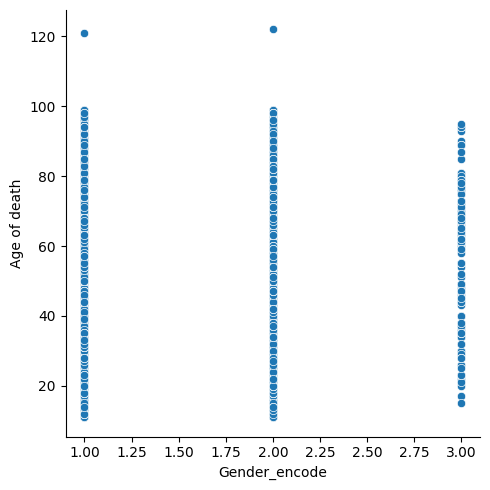

In [15]:
# Plotting encoded gender column
sns.relplot(
    data=data,
    x="Gender_encode", y="Age of death"#   
)#, col="time",
  #  hue="smoker", style="smoker", size="size",
#)


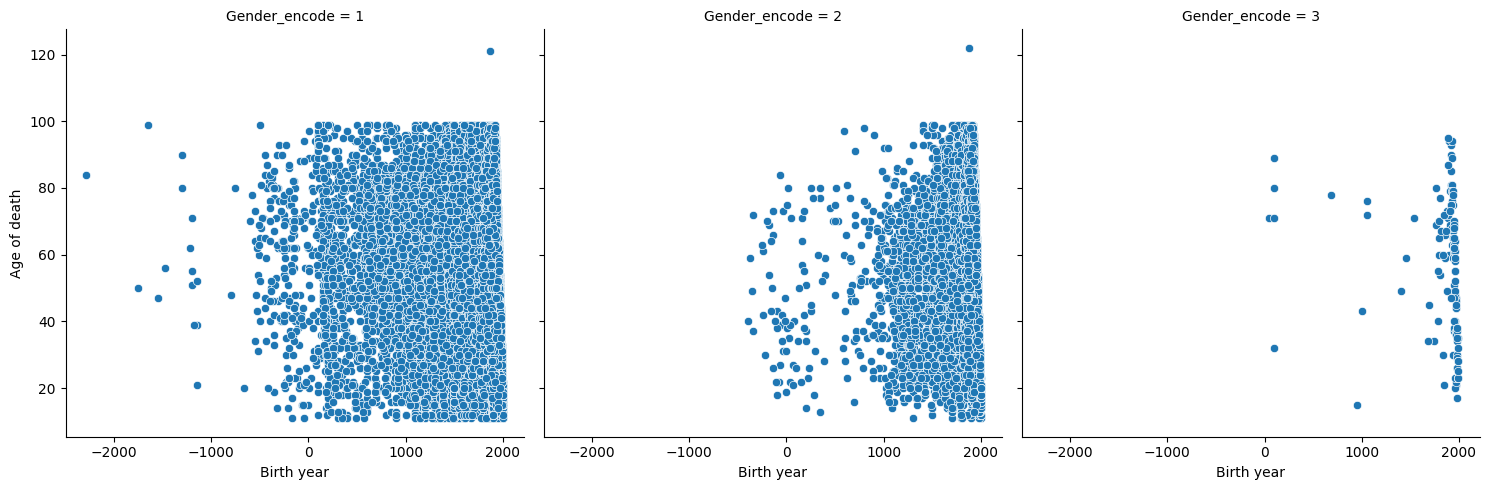

In [16]:
# Plotting encoded gender column
sns.relplot(
    data=data,
    x="Birth year", y="Age of death", 
    col="Gender_encode"#,
   #hue="smoker", style="smoker", size="size",
)


Male dominated dataset, but we already knew that. 

### Country
This column contains many different labels, because countries have changed their names throughout time and because some people might belong to different countries. So, we want to encode this column. 

- consider only including countries with a certain number of famous people?? 

In [267]:
data["Country"].value_counts()

Country
United States of America                                                             145191
Germany                                                                               78702
France                                                                                64284
United Kingdom; United Kingdom of Great Britain and Ireland                           28270
United Kingdom                                                                        21301
                                                                                      ...  
Territory of Papua                                                                        1
Ostrogothic Kingdom                                                                       1
Nazi Germany; German Democratic Republic; German Empire                                   1
Soviet Union; Russian Empire; Second Polish Republic; People's Republic of Poland         1
Syria; State of Syria; Syrian Republic                                  

In [268]:
# concatenate some columns
data["Country"] = data["Country"].str.replace('United Kingdom of Great Britain and Ireland', 'United Kingdom')

In [269]:
len(data["Country"]) # 735,785

735785

5,522 unique rows. We want to embed this column using a pretrained language model. More on that later.

#### wordcloud

In [239]:
word_list_country = [word.strip() for sublist in data['Country'].str.split(';') for word in sublist]

In [240]:
len(word_list_country) # 100,000 more rows, because some have two countries listed 

839824

In [241]:
count_country = Counter(word_list_country)

In [242]:
len(count_country)

1367

In [243]:
count_country.most_common(50)
# consider cleaning - adding some columns together 
#sorted(count_country.items())

[('United States of America', 150146),
 ('United Kingdom', 107800),
 ('Germany', 84603),
 ('France', 66611),
 ('Kingdom of Italy', 25376),
 ('Canada', 21762),
 ('Spain', 21599),
 ('Sweden', 19334),
 ('Italy', 18162),
 ('Poland', 15988),
 ('Australia', 14718),
 ('Soviet Union', 14324),
 ('Austria', 14268),
 ('Norway', 13879),
 ('Kingdom of the Netherlands', 13862),
 ('Kingdom of Great Britain', 12045),
 ('Russian Empire', 11379),
 ('Belgium', 10275),
 ('Switzerland', 10129),
 ('Japan', 9593),
 ('Denmark', 8841),
 ('Finland', 8666),
 ('Hungary', 8328),
 ('New Zealand', 6964),
 ('Argentina', 6425),
 ('Brazil', 6208),
 ('Russia', 5126),
 ('Kingdom of England', 5079),
 ('Austria-Hungary', 4763),
 ('Mexico', 4361),
 ('Czechoslovakia', 4229),
 ('Ireland', 4019),
 ('Czech Republic', 3834),
 ('British Raj', 3661),
 ('India', 3609),
 ('Netherlands', 3544),
 ('Portugal', 3305),
 ('Romania', 3249),
 ('German Democratic Republic', 2891),
 ('South Africa', 2788),
 ('German Empire', 2771),
 ('Chile',

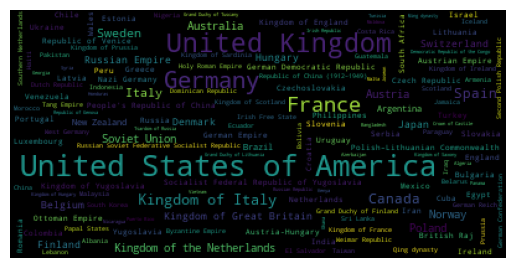

In [244]:
wordcloud_country2 = wordcloud.WordCloud().generate_from_frequencies(count_country)

plt.imshow(wordcloud_country2)#, interpolation='bilinear')
plt.axis("off")
plt.show()

### Trying to diminish number of countries 

In [348]:
# filter data based on 20 most common countries
count_country.most_common(30)

In [350]:
def clean_country(country):
    if any(string in country for string in ["United States of America", "America"]):
    #if  in country:
        return "United States of America"
    elif "Sweden" in country:
        return "Sweden"
    else:
        return "Unknown"




/var/folders/b0/t62rjb510wb79fxb5ch9n3kc0000gn/T/ipykernel_23408/3228010993.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sliced_data['country_recoded'] = sliced_data['Country'].apply(clean_country)


In [352]:
# Apply the function row-wise to the "Country" column using apply() with axis=1
data['country_recoded'] = data['Country'].apply(clean_country)

In [358]:
data.iloc[0,1]

'United States of America; Kingdom of Great Britain'

## Occupation


In [17]:
data["Occupation"].value_counts()
#data["Occupation"].unique().tolist()

Occupation
Artist                                            207657
Politician                                        153144
Athlete                                            92807
Researcher                                         64202
Military personnel                                 36313
                                                   ...  
Designer; video game developer                         1
Daimyo; coin collecting; numismatist                   1
Animator; drawer                                       1
Solicitor; philatelist; postage stamp designer         1
Director; scout leader                                 1
Name: count, Length: 7820, dtype: int64

## Preprocessing - ready for NLP

In [18]:
occupation = data["Occupation"].to_list()


In [21]:
occupation_lower = []
for idx in range(0,len(occupation)):
    temp = occupation[idx].lower()
    occupation_lower += [temp]
    

In [22]:
occupation_lower

['politician',
 'artist',
 'politician',
 'artist',
 'artist',
 'egyptologist',
 'artist',
 'artist',
 'artist',
 'artist',
 'artist',
 'astronomer',
 'politician',
 'ruler',
 'statesperson',
 'regent',
 'athlete',
 'politician',
 'artist',
 'athlete',
 'artist',
 'artist',
 'researcher',
 'politician',
 'researcher',
 'artist',
 'researcher',
 'politician',
 'artist',
 'politician',
 'artist',
 'artist',
 'artist',
 'artist',
 'politician',
 'researcher',
 'artist',
 'artist',
 'artist',
 'researcher',
 'politician',
 'politician',
 'researcher',
 'official; french resistance fighter',
 'sovereign',
 'researcher',
 'researcher',
 'researcher',
 'artist',
 'playwright',
 'military personnel',
 'researcher',
 'artist',
 'artist',
 'researcher',
 'artist',
 'artist',
 'politician',
 'politician',
 'artist',
 'artist',
 'politician',
 'politician',
 'artist',
 'artist',
 'politician',
 'politician',
 'artist',
 'artist',
 'artist',
 'politician',
 'researcher',
 'artist',
 'researcher',
 

"Occupation" also spans wide with 7,820 unique rows. We want to embed that column, too. But first, we want to know how many rows have more than one string. 

In [24]:
data['Occupation'] = occupation_lower

In [25]:
occupation_lower[43]

'official; french resistance fighter'

In [26]:
data['Occupation'].value_counts()

Occupation
artist                                            207657
politician                                        153144
athlete                                            92807
researcher                                         64202
military personnel                                 36313
                                                   ...  
designer; video game developer                         1
daimyo; coin collecting; numismatist                   1
animator; drawer                                       1
solicitor; philatelist; postage stamp designer         1
director; scout leader                                 1
Name: count, Length: 7820, dtype: int64

### consider issue with some rows having more than one string for occupation

In [27]:
# Count the number of strings in each cell
string_counts = data['Occupation'].apply(lambda x: len(x.split(';')) if isinstance(x, str) else 0)

# Filter columns where the count is greater than 1
rows_with_multiple_strings = string_counts[string_counts > 1]

# Count the number of such columns
num_rows_with_multiple_strings = len(rows_with_multiple_strings)

print("Number of rows containing more than one string:", num_rows_with_multiple_strings)


Number of rows containing more than one string: 11978


about 12k

In [28]:
#rows_with_multiple_strings.index
filtered_data = data.loc[rows_with_multiple_strings.index]


In [29]:
filtered_data['Occupation'].value_counts()

Occupation
pianist; music pedagogue                              142
suffragette; suffragist                               138
professional wrestler; amateur wrestler                96
art director; production designer                      92
racing driver; racing automobile driver                89
                                                     ... 
conductor; pianist; musicologist                        1
sailor; domestic worker                                 1
socialite; patron of the arts                           1
astronomer; astrologer; cartographer; cosmographer      1
director; scout leader                                  1
Name: count, Length: 5853, dtype: int64

In [30]:
len(filtered_data['Occupation'].unique())

5853

In [31]:
filtered_data['Occupation'].to_list()

['official; french resistance fighter',
 'game designer; role-playing game designer',
 'motorcycle racer; formula one driver',
 'geographer; explorer',
 'racing automobile driver; formula one driver',
 'farmer; formula one driver',
 'racing automobile driver; formula one driver',
 'racing automobile driver; formula one driver',
 'monk; ascetic',
 'privateer; pirate',
 'navigator; explorer',
 'sailor; explorer',
 'cartographer; naval officer; explorer; seafarer',
 'conquistador; governor; explorer',
 'ruler; aristocrat',
 'ruler; aristocrat',
 'monarch; ruler; aristocrat',
 'ruler; aristocrat',
 'ruler; aristocrat',
 'khan; regent',
 'privateer; merchant',
 'privateer; pirate',
 'professional wrestler; amateur wrestler',
 'statesperson; ruler',
 'neurologist; psychoanalyst',
 'socialite; environmentalist; philanthropist; humanitarian',
 'literary critic; novelist',
 'professional wrestler; amateur wrestler',
 'sociologist; philosopher',
 'official; ruler',
 'warrior; aristocrat',
 'nun;

### filter out rows with more than one string

In [32]:
data = data[~data.index.isin(rows_with_multiple_strings.index)]


In [33]:
len(data["Occupation"].unique())
# down to less than 2k

1967

In [34]:
# Count the number of strings in each cell
string_counts2 = data['Occupation'].apply(lambda x: len(x.split(';')) if isinstance(x, str) else 0)

# Filter columns where the count is greater than 1
rows_with_multiple_strings2 = string_counts2[string_counts2 > 1]

In [35]:
rows_with_multiple_strings2

Series([], Name: Occupation, dtype: int64)

#### Wordcloud country but only one word in each occupation row

In [36]:
word_list_occupation = [word.strip() for sublist in data['Occupation'].str.split(';') for word in sublist]

In [37]:
count_occupation = Counter(word_list_occupation)

In [38]:
count_occupation.most_common(100)

[('artist', 207657),
 ('politician', 153144),
 ('athlete', 92807),
 ('researcher', 64202),
 ('military personnel', 36313),
 ('religious figure', 18642),
 ('architect', 12612),
 ('businessperson', 12233),
 ('journalist', 10948),
 ('teacher', 10901),
 ('engineer', 8355),
 ('physician', 7591),
 ('judge', 5732),
 ('lawyer', 4467),
 ('jurist', 2849),
 ('entrepreneur', 2504),
 ('aristocrat', 2043),
 ('translator', 1748),
 ('publisher', 1712),
 ('philosopher', 1710),
 ('rower', 1553),
 ('librarian', 1196),
 ('astronomer', 1118),
 ('fencer', 1114),
 ('psychologist', 1078),
 ('novelist', 1022),
 ('surgeon', 1007),
 ('pianist', 1000),
 ('merchant', 900),
 ('author', 863),
 ('amateur wrestler', 856),
 ('farmer', 841),
 ('explorer', 833),
 ('inventor', 777),
 ('minister', 752),
 ('sailor', 708),
 ('film producer', 694),
 ('psychiatrist', 688),
 ('cinematographer', 672),
 ('police officer', 630),
 ('flying ace', 621),
 ('anthropologist', 612),
 ('banker', 596),
 ('academic', 569),
 ('geographer', 5

In [39]:
count_occupation.most_common(20)

[('artist', 207657),
 ('politician', 153144),
 ('athlete', 92807),
 ('researcher', 64202),
 ('military personnel', 36313),
 ('religious figure', 18642),
 ('architect', 12612),
 ('businessperson', 12233),
 ('journalist', 10948),
 ('teacher', 10901),
 ('engineer', 8355),
 ('physician', 7591),
 ('judge', 5732),
 ('lawyer', 4467),
 ('jurist', 2849),
 ('entrepreneur', 2504),
 ('aristocrat', 2043),
 ('translator', 1748),
 ('publisher', 1712),
 ('philosopher', 1710)]

In [40]:
# make word cloud using counter 
wordcloud_occupation = wordcloud.WordCloud().generate_from_frequencies(count_occupation)


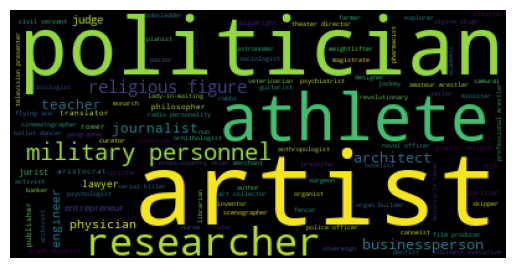

In [41]:
plt.imshow(wordcloud_occupation)#, interpolation='bilinear')
plt.axis("off")
plt.show()

### Birth year

<Axes: xlabel='Birth year', ylabel='Count'>

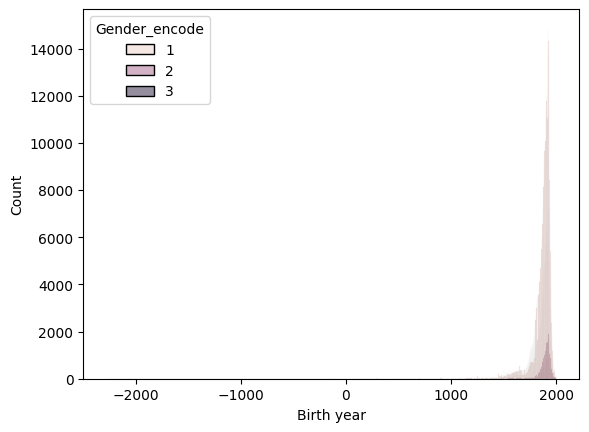

In [42]:
sns.histplot(data = data, x = 'Birth year', hue = 'Gender_encode')

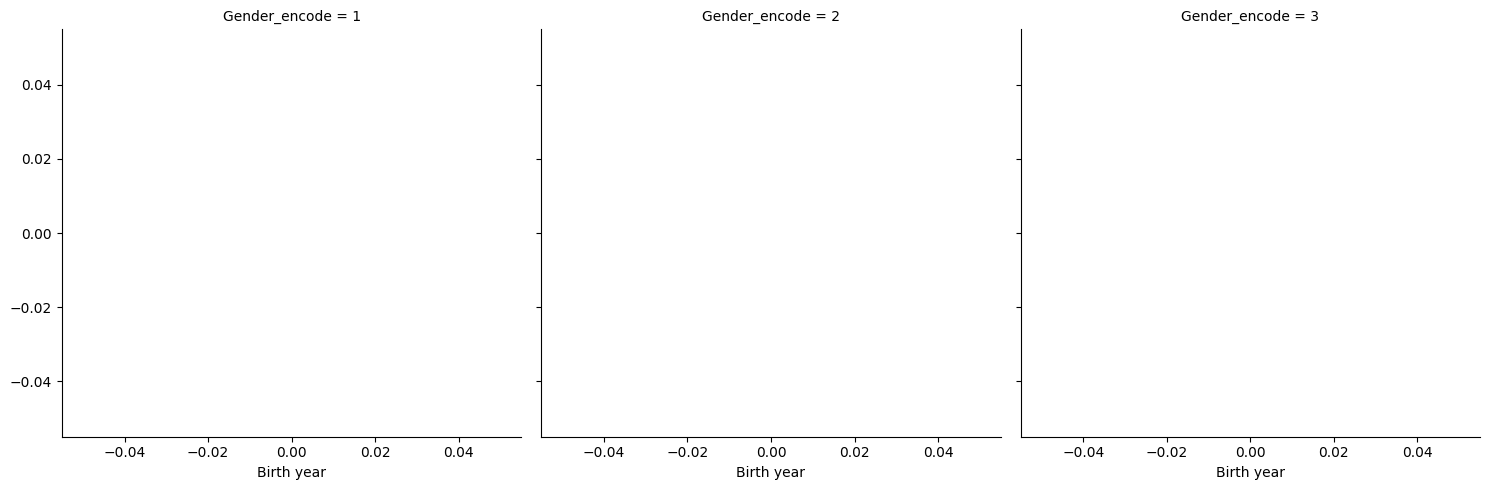

In [43]:
# Plotting encoded gender column
sns.relplot(
    data=data,
    x="Birth year", 
    col="Gender_encode"#,
   #hue="smoker", style="smoker", size="size",
)

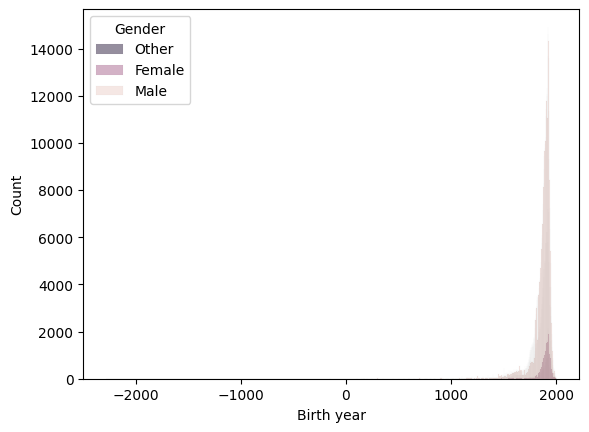

In [44]:
#seaborn.histplot(data = data, x = 'Birth year', hue = 'Gender_encode')
p = sns.histplot(data = data, x = 'Birth year', hue = 'Gender_encode', legend = False)

plt.legend(title = "Gender", loc = "upper left", labels = ["Other", "Female", "Male"])
plt.show(p)



### Age of death
The outcome variable, which we seek to predict.

/var/folders/b0/t62rjb510wb79fxb5ch9n3kc0000gn/T/ipykernel_50583/2710900680.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(["Male", "Female", "Other"])


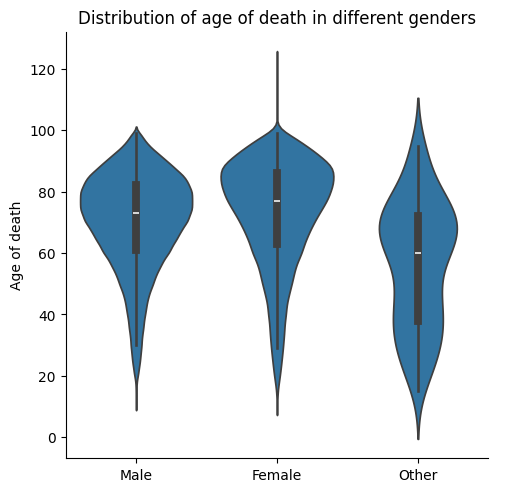

In [45]:
#sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)
sns.catplot(data=data, kind = 'violin', x = 'Gender_encode', y = 'Age of death')#, hue = "Gender_encode")#, split = True)

plt.gca().set_xticklabels(["Male", "Female", "Other"])
plt.gca().set_title('Distribution of age of death in different genders')
plt.gca().set_xlabel('')

plt.show()

In [46]:
# For fun
data_ar_pol = data[data['Occupation'].isin(["politician", "artist"])]
#data_ar_pol = data_ar_pol[data_ar_pol['Gender_encode'].isin([1, 2])]
data_ar_pol.head()
data_ar_pol['Occupation'].value_counts()
data_ar_pol['Gender_encode'].value_counts()

Gender_encode
1    315502
2     45230
3        69
Name: count, dtype: int64

/var/folders/b0/t62rjb510wb79fxb5ch9n3kc0000gn/T/ipykernel_50583/472536192.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(["Male", "Female", "Other"])


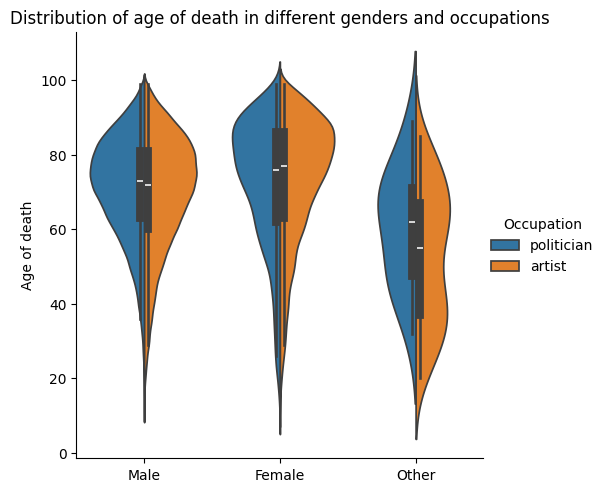

In [47]:
#sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)
sns.catplot(data=data_ar_pol, kind = 'violin', x = "Gender_encode", y = 'Age of death', hue = "Occupation", split = True)

plt.gca().set_xticklabels(["Male", "Female", "Other"])
plt.gca().set_title('Distribution of age of death in different genders and occupations')
plt.gca().set_xlabel('')

plt.show()

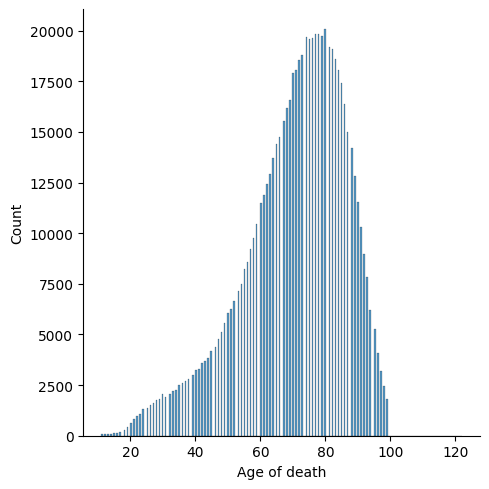

In [48]:
#sns.displot(data=tips, x="total_bill", col="time", kde=True)
sns.displot(data = data, x= 'Age of death', kind = 'hist')

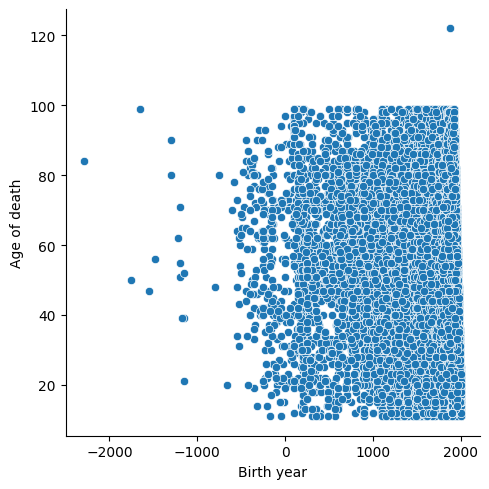

In [49]:
# Age of death compared to when you were born

sns.relplot(
    data=data,
    x="Birth year", y="Age of death" 
   #col="Gender_encode"#,
   #hue="smoker", style="smoker", size="size",
)


In [233]:
data['Birth year'].min()

-2284

In [69]:
bins=range(-2284, 2024, 250)

In [70]:
data['Birth_year_group'] = pd.cut(data['Birth year'], bins = bins, right=False)


In [64]:
data.head()

,Gender,Country,Occupation,Birth year,Age of death,Gender_encode,Birth_year_group
0,Male,United States of America; Kingdom of Great Bri...,politician,1732,67.0,1,"[1716, 1966)"
1,Male,United Kingdom,artist,1952,49.0,1,"[1716, 1966)"
2,Male,United States of America,politician,1809,56.0,1,"[1716, 1966)"
3,Male,Archduchy of Austria; Archbishopric of Salzburg,artist,1756,35.0,1,"[1716, 1966)"
4,Male,Holy Roman Empire; Austrian Empire,artist,1770,57.0,1,"[1716, 1966)"


In [65]:
mean_age_of_death = data.groupby('Birth_year_group')['Age of death'].mean().reset_index()


/var/folders/b0/t62rjb510wb79fxb5ch9n3kc0000gn/T/ipykernel_50583/430851.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_age_of_death = data.groupby('Birth_year_group')['Age of death'].mean().reset_index()


In [66]:
mean_age_of_death

,Birth_year_group,Age of death
0,"[-2284, -2034)",84.000000
1,"[-2034, -1784)",NaN
2,"[-1784, -1534)",65.333333
3,"[-1534, -1284)",75.333333
4,"[-1284, -1034)",48.750000
5,"[-1034, -784)",48.000000
6,"[-784, -534)",58.375000
7,"[-534, -284)",62.117647
8,"[-284, -34)",51.978571
9,"[-34, 216)",56.228228


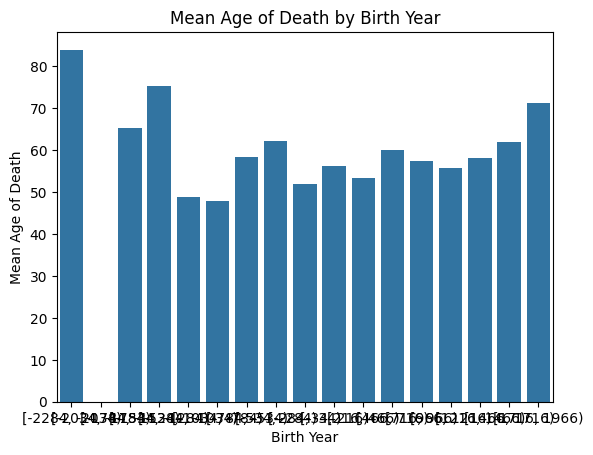

In [67]:
sns.barplot(data=mean_age_of_death, x='Birth_year_group', y='Age of death')

# Add labels and title
plt.xlabel('Birth Year')
plt.ylabel('Mean Age of Death')
plt.title('Mean Age of Death by Birth Year')

plt.show()

In [71]:


# Bin 'Birth_Year' into groups of every 10 years
#bins = range(-2284, 2000, 20)
data['Birth_year_group'] = pd.cut(data['Birth year'], bins=bins, right=False)

bin_midpoints = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins) - 1)]

mean_age_of_death['bin_mid'] = bin_midpoints
# Calculate the mean age of death for each birth year group
mean_age_of_death = data.groupby('Birth_year_group')['Age of death'].mean().reset_index()


/var/folders/b0/t62rjb510wb79fxb5ch9n3kc0000gn/T/ipykernel_50583/1077292008.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_age_of_death = data.groupby('Birth_year_group')['Age of death'].mean().reset_index()


In [72]:
mean_age_of_death['bin_mid'] = bin_midpoints
mean_age_of_death['bin_mid'] = mean_age_of_death['bin_mid'].astype(int)
mean_age_of_death.head()

,Birth_year_group,Age of death,bin_mid
0,"[-2284, -2034)",84.000000,-2159
1,"[-2034, -1784)",NaN,-1909
2,"[-1784, -1534)",65.333333,-1659
3,"[-1534, -1284)",75.333333,-1409
4,"[-1284, -1034)",48.750000,-1159


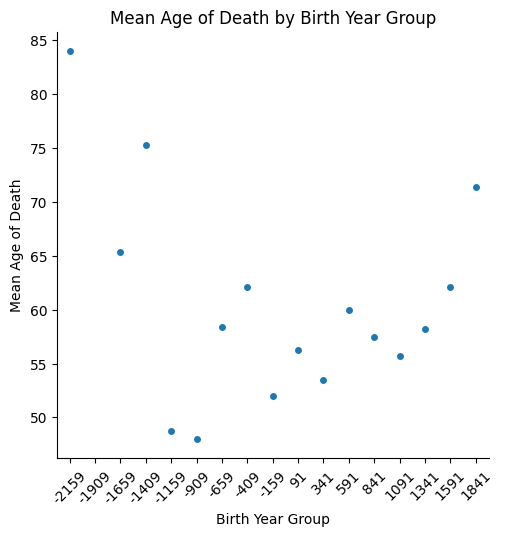

In [75]:
sns.catplot(data = mean_age_of_death, x='bin_mid', y='Age of death')#, marker='o', color='blue')

plt.xlabel('Birth Year Group')
plt.ylabel('Mean Age of Death')
plt.title('Mean Age of Death by Birth Year Group')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.gca().set_xticks(plt.gca().get_xticks()[::])  # Show every 10th tick # [::10]

plt.show()

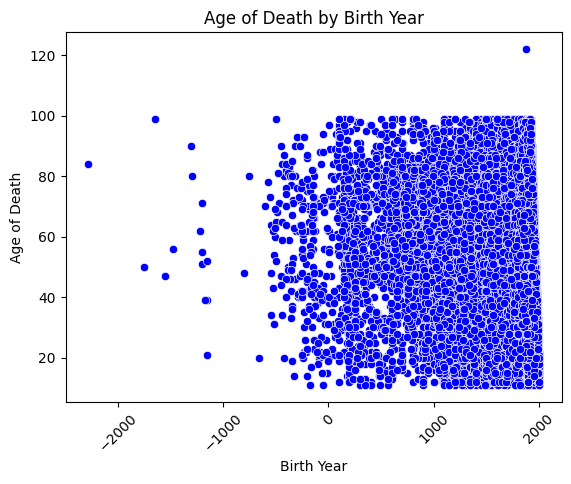

In [78]:
sns.scatterplot(x='Birth year', y='Age of death', data=data, marker='o', color='blue')

# Add labels and title
plt.xlabel('Birth Year')
plt.ylabel('Age of Death')
plt.title('Age of Death by Birth Year')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

### Joint plots

Error in callback <function _draw_all_if_interactive at 0x13347e950> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

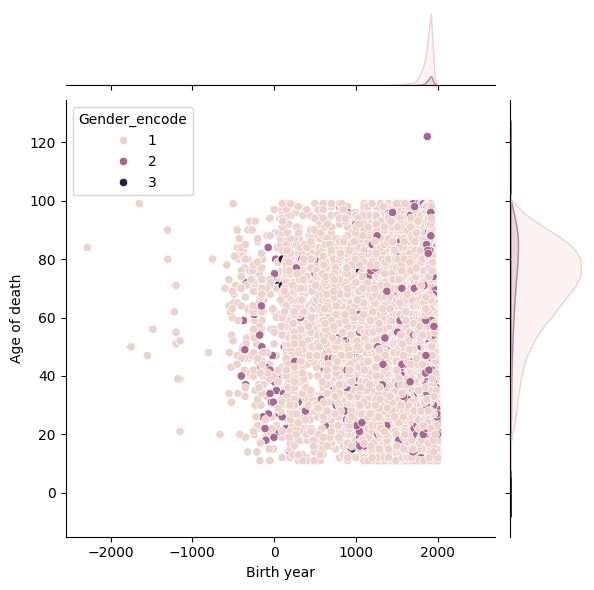

In [79]:
#sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")
sns.jointplot(data=data, x="Birth year", y="Age of death", hue="Gender_encode")

In [80]:
sns.pairplot(data=data, hue="Gender_encode")

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x28f9c6950> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

# splitting data into training, validation and test 

In [81]:
# rearranging the order of columns
data = data[["Gender_encode", "Country", "Occupation", "Birth year", "Age of death"]]

In [82]:
data.head()

,Gender_encode,Country,Occupation,Birth year,Age of death
0,1,United States of America; Kingdom of Great Bri...,politician,1732,67.0
1,1,United Kingdom,artist,1952,49.0
2,1,United States of America,politician,1809,56.0
3,1,Archduchy of Austria; Archbishopric of Salzburg,artist,1756,35.0
4,1,Holy Roman Empire; Austrian Empire,artist,1770,57.0


In [83]:
X = data.iloc[:,:4].values # all rows, column 1 to (not incl) 4
y = data.iloc[:,4].values # all rows, column 4

In [84]:
# split data into train and test using scikitlearn
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.15, 
                                                    random_state=42)


# let's further split the training set into a training and a validation set (15%)
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train,
                                                  test_size=X_test.shape[0] / X_train.shape[0],  
                                                  random_state=42)

In [85]:
# save data
for x,y,name in zip([X_train, X_val, X_test],
                    [y_train, y_val, y_test],
                    ['train', 'val', 'test']):
    df = pd.DataFrame(np.hstack([x,y.reshape(-1,1)]))
    df.columns = data.columns
    df.to_csv(f'data/{name}.csv')

# General plots of data

# seaborn something... correlation plots?? 

In [ ]:
#data= data.filter(items = ['Gender', 'Country', 'Occupation', 'Birth year', 'Age of death'])